**Inaugural project, group: PaulaEmma's**

This group consists of:
1. Emma Eberlé
2. Paula Bolduratu
3. Emma Lange

In this project, we are working with a benchmark model of insurance policies, Mossin’s model. 
The expected value if the agent is not insured would be: $$ V_0 =pu(y-x)+(1-p)u(y)$$

An insured agent will have expected utility: $$V(q;\pi)=pu(y-x+q-\pi(p,q))+(1-p)u(y-\pi(p,q))$$
$\pi(p,q)$ represents the premium: $$\pi(p,q)=p*q$$
Utility of the assets is given by $u(z)$:$$u(z)= \frac{z^{1+\theta}}{1+\theta}$$

With $y$ the amount of assets the agent holds; $x$ the monetary loss he may suffer with a probability $p$ and $q\in [0,x]$ the coverage amount of the insurance. 

We can use the following parameterization: $$y=1$$ $$\theta=-2$$ $$p=0.2$$


In [1]:
%load_ext autoreload
%autoreload 2

Importing modules: 

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Question 1 

In this question we have to construct a function that takes (x, y, p) as arguments and returns the agents’ optimal
insurance coverage for a grid of x's between 0.01 and 0.9. This function will be called "solver" and we will use some previously define functions to make it works. We will after plot the results. 

**Define all the functions**

In [23]:
def premium(p,q):
    """Return the premiumt """
    return p*q
     
def u(z,theta):
    """Return the utility of the assets"""
    return (z**(1+theta))/(1+theta)
    
def expected_utility(p,y,x,q):
    """Return the expected utility with an insurance"""
    return p*u(y-x+q-premium(p,q), theta)+(1-p)*u(y-premium(p,q),theta)

**Define known parameters**   
Here we give to N the value 100, it will be our range for the calculations of the optimals q's

In [4]:
theta=-2
y=1
p=0.2
N=100

Create an array of x's equally distributed between 0.01 and 0.9 and an empty array to store all the optimal q's. 

In [5]:
x_array=np.linspace(0.01,0.9,N)
qs_optimal=np.zeros(N)

We define here the solver, with the help of the module scipy and the method 'bounded'.  
Then we loop over the x and store the results in the qs_optimal array. 

In [6]:
def solver(p,y,x):
    obj = lambda q: -expected_utility(p,y,x,q)
    res = optimize.minimize_scalar(obj,bounds=(0,x),method='bounded')
    return res.x

for i in range(N):
    qs_optimal[i] = solver(p,y,x_array[i])        

To plot the result we use the matplotlib module. 

Text(0.5, 1.0, 'Optimal coverage amount depending on monetary loss')

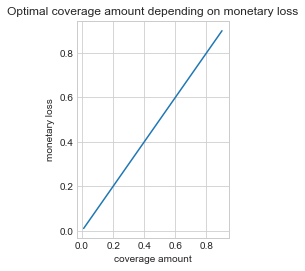

In [7]:
plt.style.use('seaborn-whitegrid')
fig=plt.figure()
ax = fig.add_subplot(1,2,1)  
ax.plot(qs_optimal,x_array)
ax.set_ylabel('monetary loss')
ax.set_xlabel('coverage amount')
ax.set_title('Optimal coverage amount depending on monetary loss')

We can notice that the optimal coverage amount is equal to the potential monetary loss.

# Question 2

We now want to find the set of acceptable contracts from the agent’s point of view, i.e. all the contracts $(q,π)$ that ensure an expected value at least as good as if not having an insurance, $V(q; π) = V_0$.\
\
$i.$ We let the loss be $x= 0.6$ and construct a grid of $q$ over [0.01, 0.6]. The utility functions now become:

In [8]:
def u(z, delta = -2):
    return (z**(1+delta))/(1+delta)

def V0(x=0.6, y = 1, p = 0.2): # fixing x=0.6 for both insured and uninsured agents
    return p*u(y-x) + (1-p)*u(y)
 
def V(q, pi, x=0.6, y = 1, p = 0.2): # fixing x=0.6 for both insured and uninsured agents
    return p*u(y-x+q-pi) + (1-p)*u(y-pi)

We print the utility level of the uninsured agents as a reference:

In [ ]:
print(V0())

$ii.$ We now want to loop over each element in the grid of $q's$ and find the corresponding $π$ such that $V(q;π) = V_0$. \
First we solve for q=4, and then we loop over possible values of q:

In [ ]:
def choose(pi):
    return np.absolute(V(pi=pi, q=0.4)-V0()) 

# we define an objective function and minimize the absolute value of insured utility and uninsured utility
sol = optimize.minimize_scalar(
    choose,
    method='bounded',
    bounds=(0,0.6)) #we only look at the interval [0,0.6] 

pi = sol.x
print(pi)

We now  analyze for different values of q (limited to the interval $[0.01,0.6]$):

In [ ]:
import numpy as np
from scipy import optimize

pi_save = np.empty(100) #the results are stored in a numpy array
ins_acc = np.empty(100)
q_vec = np.linspace(0.01, 0.6, 100)
for i, q in enumerate(q_vec):
    #define what is to be minimized
    def choose(pi):
        return np.absolute(V(pi=pi, q=q)-V0())
    #call the solver
    sol = optimize.minimize_scalar(
        choose,
        method='bounded',
        bounds=(0.,0.6))
    pi=sol.x
    pi_save[i]=pi
    ins_acc[i] = 0.2*q

$iii.$ We now plot the acceptable premiums:

In [ ]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(q_vec,pi_save,ls='--',lw=2,color='blue',label='$\widetilde{\pi}$ depending on q')
ax.plot(q_vec,ins_acc,ls='-',lw=2,color='green',label='$\pi$(p,q)=$p*q$')
ax.fill_between(q_vec, ins_acc, pi_save, color="lightgreen", label="acceptable premiums")
ax.set_xlabel('$q$')
ax.set_ylabel('$\widetilde{\pi} $, $\pi$')
ax.grid(True)
ax.legend(loc='lower right')
plt.title("acceptable premiums, $\widetilde{\pi}$")
plt.xlim([0, 0.6])
plt.ylim([0, 0.25])

? I'm not really sure what I am doing wrong here, but I don't think the plot should look like this...? 

# Question 3

$i.$ We need to create a function that computes $V(γ,π)$ by Monte Carlo integration using at least 10,000 draws.

In [ ]:
 #we start by importing the relevant modules
import math
import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import ipywidgets as widgets

We define the function that we need to integrate and then define the Monte Carlo function:

$ii.$ The agent prefers the insurance policy that...

# Question 4